# Lab 1 Analysis Example using Thicket

In [212]:
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [213]:
# # jupyter
# tk = th.Thicket.from_caliperreader(glob("/home/stevenm27/435Project/caliper/cpu_mpi/naive/*.cali", recursive=True))

# local
parallel = 'cpu_mpi'
algo = 'naive'

# GLOBAL VARS
process_cols = (4, 8, 16, 32, 64, 128) # MPI NAIVE
# process_cols = (1, 4, 16, 64) # MPI SUMMA
# process_cols = (1, 2, 4, 8, 16, 32) # CUDA NAIVE

tk = th.Thicket.from_caliperreader(glob(f"../caliper/{parallel}/{algo}/*.cali", recursive=True))

# Performance data
tk.dataframe.head(20)
# tk.metadata

nid   spot.channel  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 142883405     1  regionprofile   
                                     412597447     1  regionprofile   
                                     515810813     1  regionprofile   
                                     771811601     1  regionprofile   
                                     871049276     1  regionprofile   
                                     893815175     1  regionprofile   
                                     901397514     1  regionprofile   
                                     1056753587    1  regionprofile   
                                     1131492304    1  regionprofile   
                                     1279670555    1  regionprofile   
                                     1403990618    1  regionprofile   
                                     1431819496    1  regionprofile   
                                     1552272886    1  regionprofile   
                                     1857268504    1  regionprofile   
                                     1906046630    1  regionprofile   
                                     2079914886    1  regionprofile   
                                     2245410329    1  regionprofile   
                                     2324395698    1  regionprofile   
                                     2372515623    1  regionprofile   
                                     2450099188    1  regionprofile   

                                                 Min time/rank  Max time/rank  \
node                                 profile                                    
{'name': 'main', 'type': 'function'} 142883405        0.393226       0.393226   
                                     412597447        0.803614       0.803614   
                                     515810813       68.222752      68.222752   
                                     771811601      903.904171     903.904171   
                                     871049276       53.583578      53.583578   
                                     893815175        0.413590       0.413590   
                                     901397514       53.824074      53.824074   
                                     1056753587       7.837576       7.837576   
                                     1131492304       6.653684       6.653684   
                                     1279670555    1456.436239    1456.436239   
                                     1403990618       0.398038       0.398038   
                                     1431819496    1455.863900    1455.863900   
                                     1552272886       0.343892       0.343892   
                                     1857268504       6.660994       6.660994   
                                     1906046630    1365.843221    1365.843221   
                                     2079914886       0.911755       0.911755   
                                     2245410329       6.981302       6.981302   
                                     2324395698       0.349152       0.349152   
                                     2372515623       1.109510       1.109510   
                                     2450099188       1.158627       1.158627   

                                                 Avg time/rank   Total time  \
node                                 profile                                  
{'name': 'main', 'type': 'function'} 142883405        0.393226     0.393226   
                                     412597447        0.803614     0.803614   
                                     515810813       68.222752    68.222752   
                                     771811601      903.904171   903.904171   
                                     871049276       53.583578    53.583578   
                                     893815175        0.413590     0.413590   
                                     901397514       53.824074    53.82

Compose these 3 groups column-wise to get a holistic view of the data

In [214]:
gb = tk.groupby("num_procs")

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk.dataframe.head(20)

6  thickets created...
{1: <thicket.thicket.Thicket object at 0x00000121FCFB75D0>, 2: <thicket.thicket.Thicket object at 0x00000121FB4531D0>, 4: <thicket.thicket.Thicket object at 0x00000121FCAA1910>, 8: <thicket.thicket.Thicket object at 0x00000121FB46C850>, 16: <thicket.thicket.Thicket object at 0x00000121EF6BE310>, 32: <thicket.thicket.Thicket object at 0x0000012180B94E50>}


1                 \
                                                     nid   spot.channel   
node                                       InputSize                      
{'name': 'main', 'type': 'function'}       128         1  regionprofile   
                                           256         1  regionprofile   
                                           512         1  regionprofile   
                                           1024        1  regionprofile   
                                           2048        1  regionprofile   
                                           4096        1  regionprofile   
{'name': 'comm', 'type': 'function'}       128         3  regionprofile   
                                           256         3  regionprofile   
                                           512         3  regionprofile   
                                           1024        3  regionprofile   
                                           2048        3  regionprofile   
                                           4096        3  regionprofile   
{'name': 'cudamemcpy', 'type': 'function'} 128         4  regionprofile   
                                           256         4  regionprofile   
                                           512         4  regionprofile   
                                           1024        4  regionprofile   
                                           2048        4  regionprofile   
                                           4096        4  regionprofile   
{'name': 'comp', 'type': 'function'}       128         5  regionprofile   
                                           256         5  regionprofile   

                                                                    \
                                                     Min time/rank   
node                                       InputSize                 
{'name': 'main', 'type': 'function'}       128            0.542437   
                                           256            0.402259   
                                           512            1.109510   
                                           1024           7.837576   
                                           2048          68.222752   
                                           4096         903.904171   
{'name': 'comm', 'type': 'function'}       128            0.000215   
                                           256            0.000349   
                                           512            0.001060   
                                           1024           0.002991   
                                           2048           0.011048   
                                           4096           0.059830   
{'name': 'cudamemcpy', 'type': 'function'} 128            0.000170   
                                           256            0.000304   
                                           512            0.000985   
                                           1024           0.002906   
                                           2048           0.010944   
                                           4096           0.059713   
{'name': 'comp', 'type': 'function'}       128            0.000445   
                                           256            0.003029   

                                                                    \
                                                     Max time/rank   
node                                       InputSize                 
{'name': 'main', 'type': 'function'}       128            0.542437   
                                           256            0.402259   
                                           512            1.109510   
                                           1024           7.837576   
                                           2048          68.222752   
                                           4096         903.904171   
{'name': 'comm', 'type': 'function'}       128            0.000215   
                  

Perform pandas operations to get the table in a desirable format for plotting

In [215]:
# Drop unwanted columns
array = [("node","")]
for i in process_cols:
    # comment out the one you wnat to plot
    array.append((i,"nid"))
    array.append((i,"spot.channel"))
    array.append((i,"Min time/rank"))
    array.append((i,"Max time/rank"))
    # array.append((i,"Avg time/rank"))
    array.append((i,"Total time"))
    array.append((i,"Variance time/rank"))

ctk.dataframe = ctk.dataframe.reset_index().drop(array, axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

ctk.dataframe.columns

MultiIndex([( 1,     'Avg time/rank'),
            ( 1, 'Avg GPU time/rank'),
            ( 1, 'Min GPU time/rank'),
            ( 1, 'Max GPU time/rank'),
            ( 1,    'Total GPU time'),
            ( 2,     'Avg time/rank'),
            ( 2, 'Avg GPU time/rank'),
            ( 2, 'Min GPU time/rank'),
            ( 2, 'Max GPU time/rank'),
            ( 2,    'Total GPU time'),
            ( 4,     'Avg time/rank'),
            ( 4, 'Avg GPU time/rank'),
            ( 4, 'Min GPU time/rank'),
            ( 4, 'Max GPU time/rank'),
            ( 4,    'Total GPU time'),
            ( 8,     'Avg time/rank'),
            ( 8, 'Avg GPU time/rank'),
            ( 8, 'Min GPU time/rank'),
            ( 8, 'Max GPU time/rank'),
            ( 8,    'Total GPU time'),
            (16,     'Avg time/rank'),
            (16, 'Avg GPU time/rank'),
            (16, 'Min GPU time/rank'),
            (16, 'Max GPU time/rank'),
            (16,    'Total GPU time'),
            (32,     'Avg

In [218]:
# ctk.dataframe.loc['comp_large']

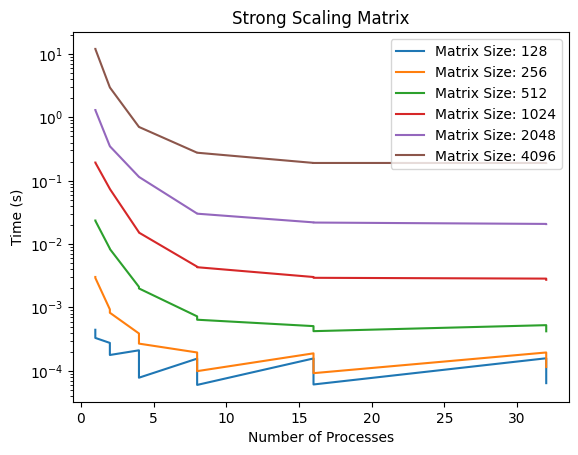

                      1                                                        \
          Avg time/rank Avg GPU time/rank Min GPU time/rank Max GPU time/rank   
InputSize                                                                       
128            0.000445          0.000331          0.000331          0.000331   
256            0.003029          0.002929          0.002929          0.002929   
512            0.023544          0.023380          0.023380          0.023380   
1024           0.193242          0.193044          0.193044          0.193044   
2048           1.303849          1.303603          1.303603          1.303603   
4096          12.003080         12.002796         12.002796         12.002796   

                                     2                                      \
          Total GPU time Avg time/rank Avg GPU time/rank Min GPU time/rank   
InputSize                                                                    
128             0.000331      0.0002

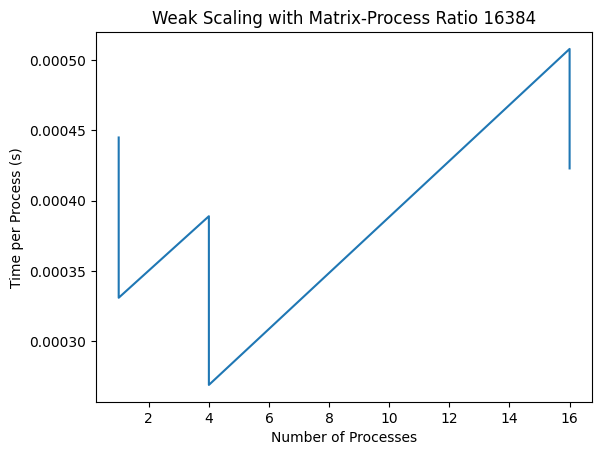

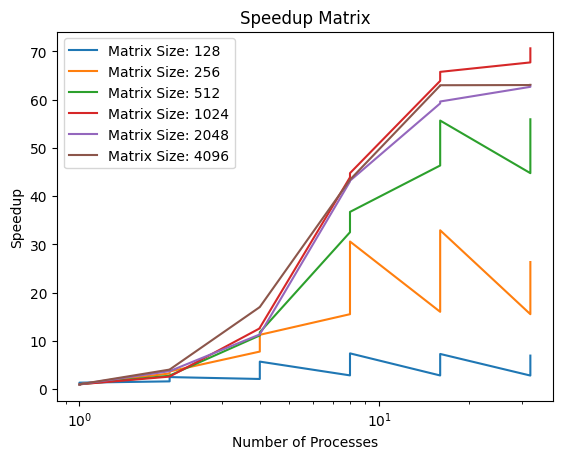

In [219]:
# Plot stuff!
df = ctk.dataframe
matrix_sizes = [128, 256, 512, 1024, 2048, 4096]
caliper_label = 'comp'

# Strong Scaling: Time vs Procs
for matrix_size in matrix_sizes:
    data = df.loc[caliper_label, matrix_size]
    data.index = data.index.droplevel(1)
    axis = data.plot(
        title=f"Strong Scaling Matrix",
        label=f"Matrix Size: {matrix_size}",
        xlabel="Number of Processes",
        ylabel="Time (s)",
    )
    # axis.set_xscale("log")
    axis.set_yscale("log")
plt.legend()
plt.show()


# Weak Scaling: Time per Proc vs Procs
import numpy as np
subset = df.loc[caliper_label]
print(subset)
data = []
labels = []
ratio = subset.index[0]**2 // subset.columns[0][0]
for i in range(subset.shape[1]):
    num_procs = subset.columns[i][0]
    target_size = (num_procs * ratio) ** 0.5
    try:
        data.append(subset.iloc[:, i].loc[target_size])
        labels.append(num_procs)
    except KeyError:
        continue
data = pd.Series(data)
data.index = labels
print(data)
# data = pd.Series(np.diag(df.loc[caliper_label].to_numpy()))
# data.index = matrix_sizes
plt.plot(data)
plt.title(f"Weak Scaling with Matrix-Process Ratio {ratio}")
plt.xlabel("Number of Processes")
plt.ylabel("Time per Process (s)")
# plt.xscale("log")
# plt.yscale("log")
plt.show()


# Speedup: Sequential Time / Parallel Time vs Procs
for matrix_size in matrix_sizes:
    data = df.loc[caliper_label, matrix_size]
    data.index = data.index.droplevel(1)
    data.name = f"Matrix Size: {matrix_size}"
    axis = (data.iloc[0] / data).plot(
        title=f"Speedup Matrix",
        xlabel="Number of Processes",
        ylabel="Speedup",
    )
    axis.name = f"Matrix Size: {matrix_size}"
    axis.set_xscale("log")
plt.legend()
plt.show()


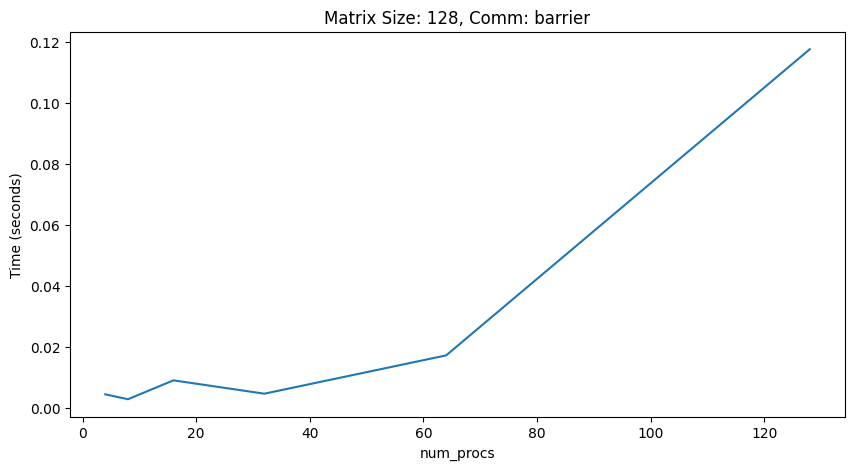

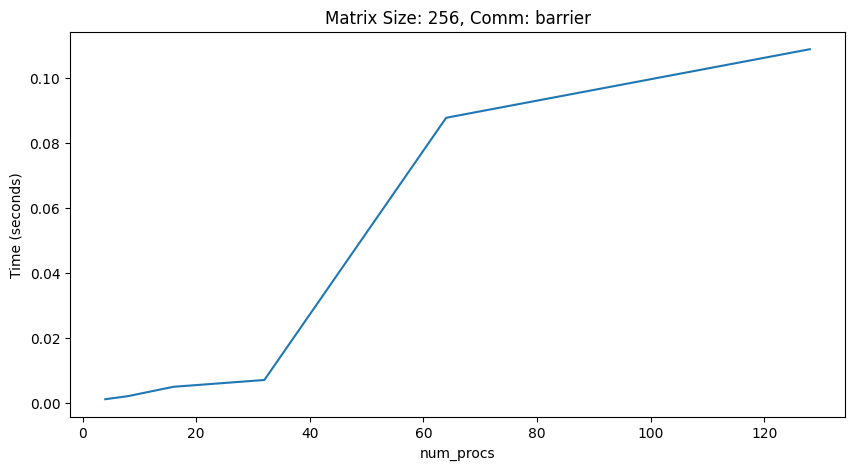

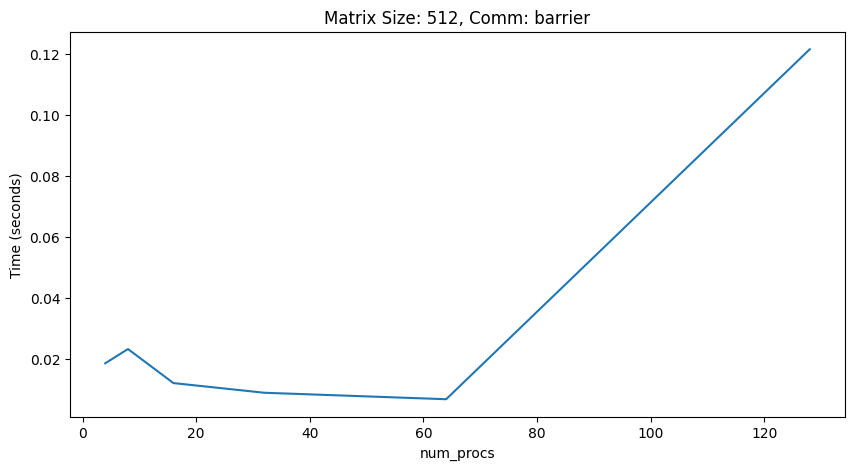

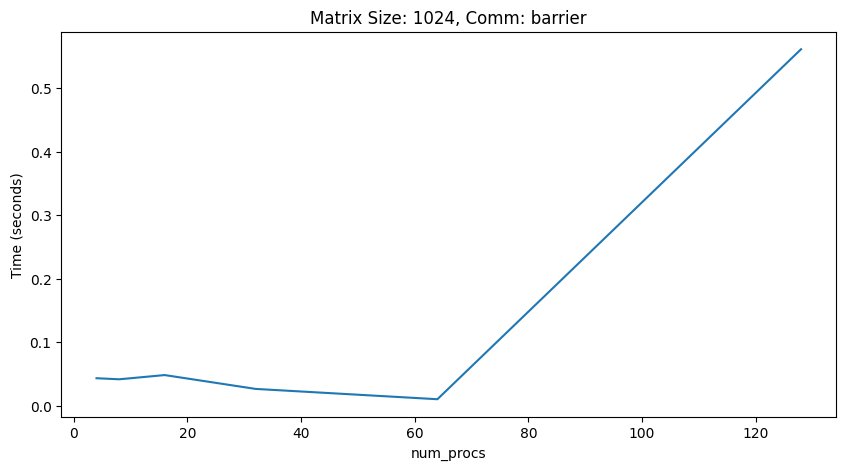

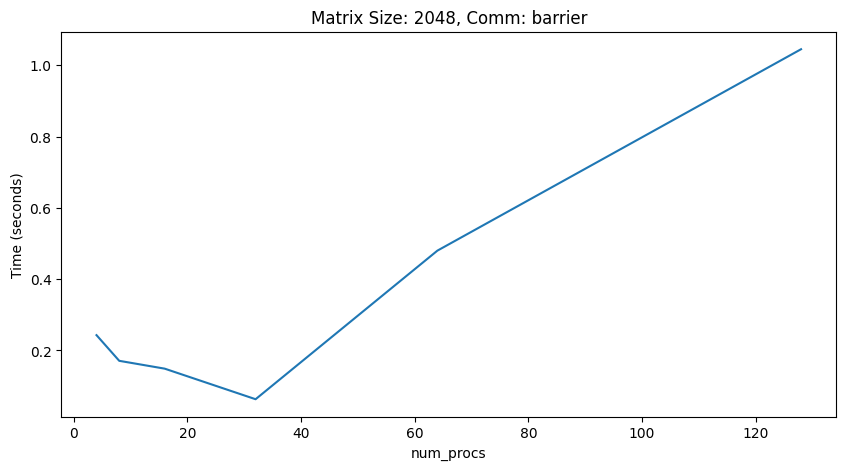

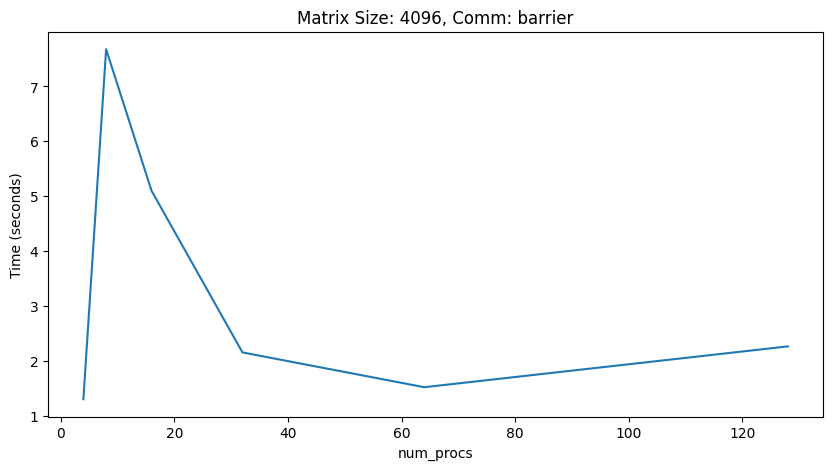

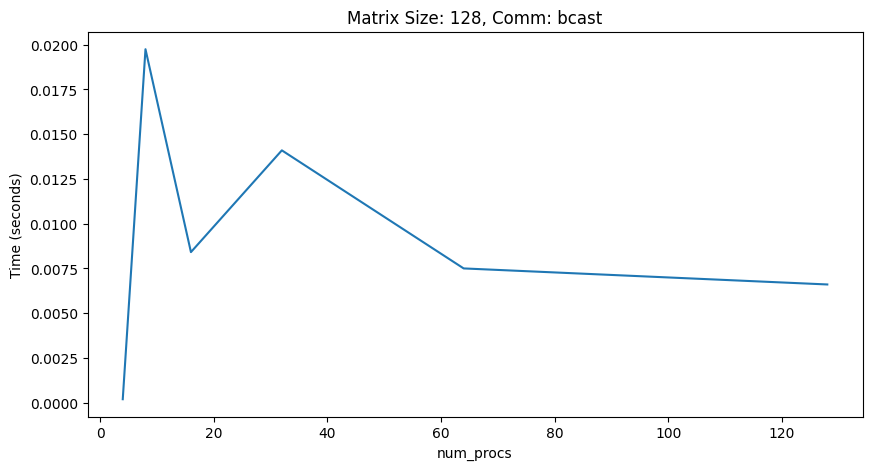

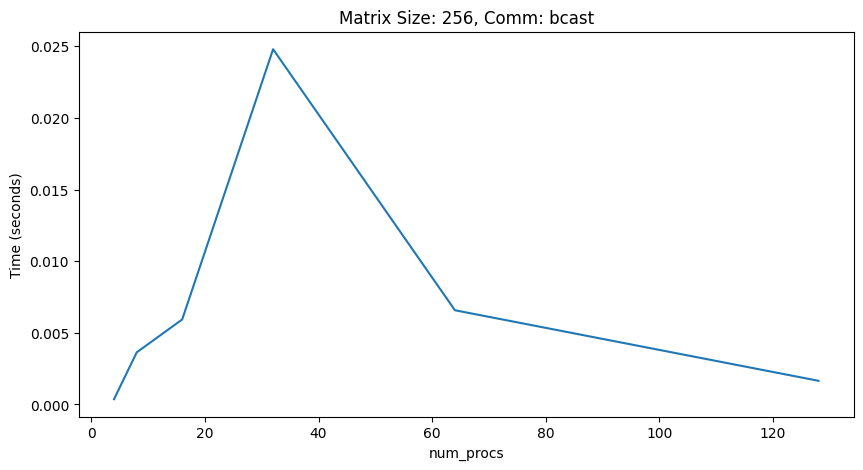

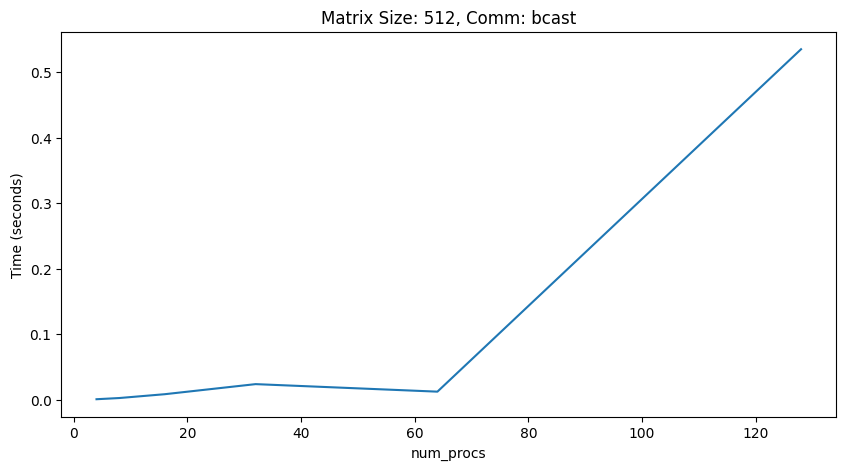

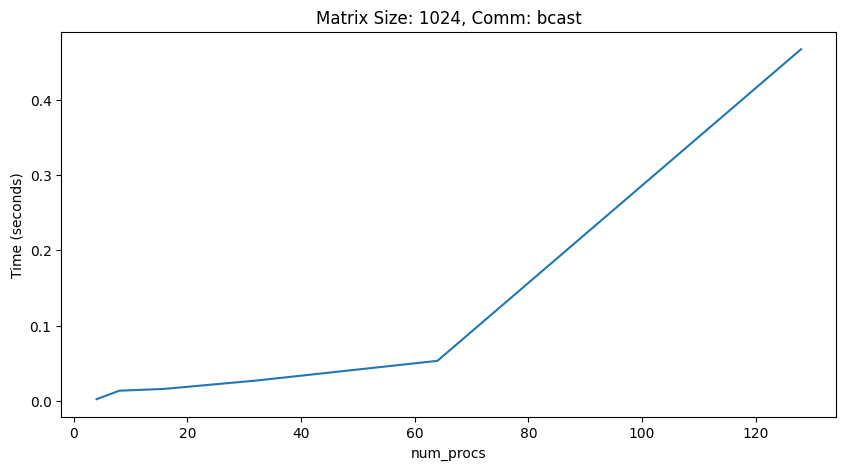

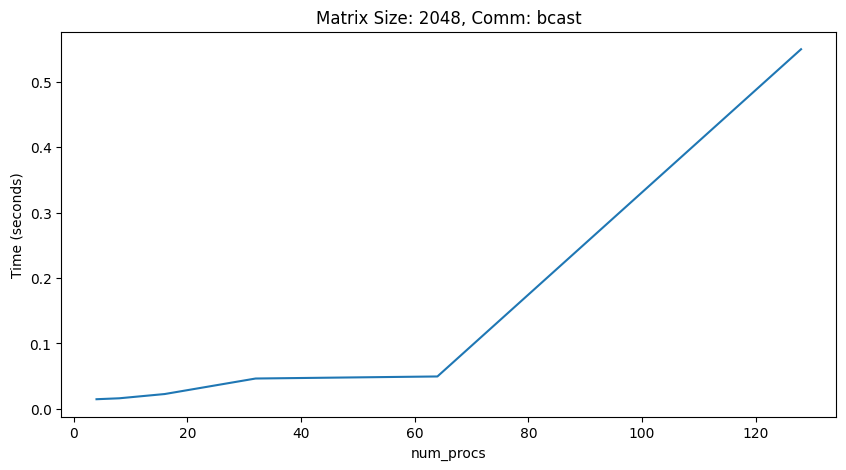

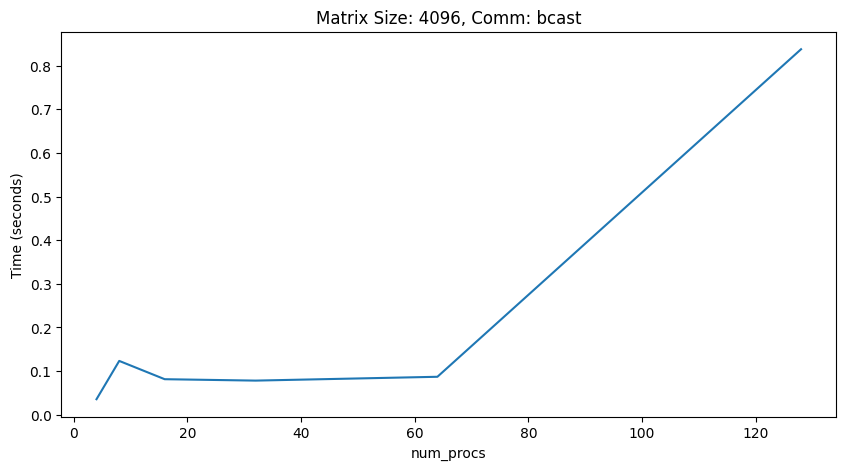

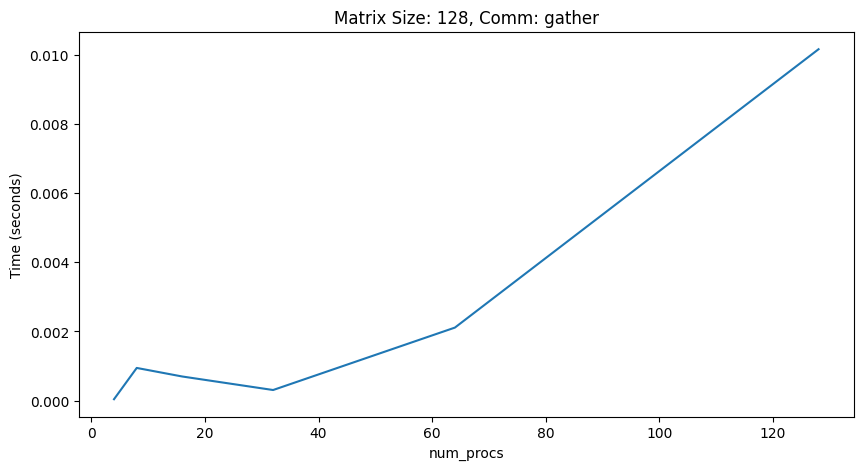

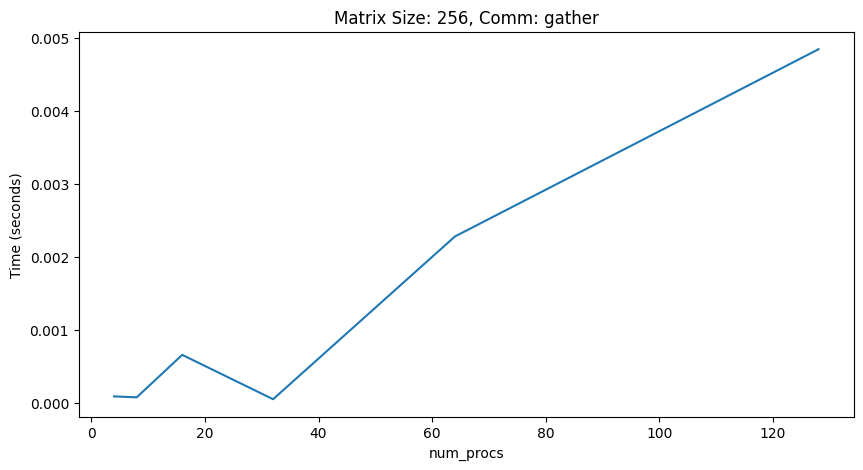

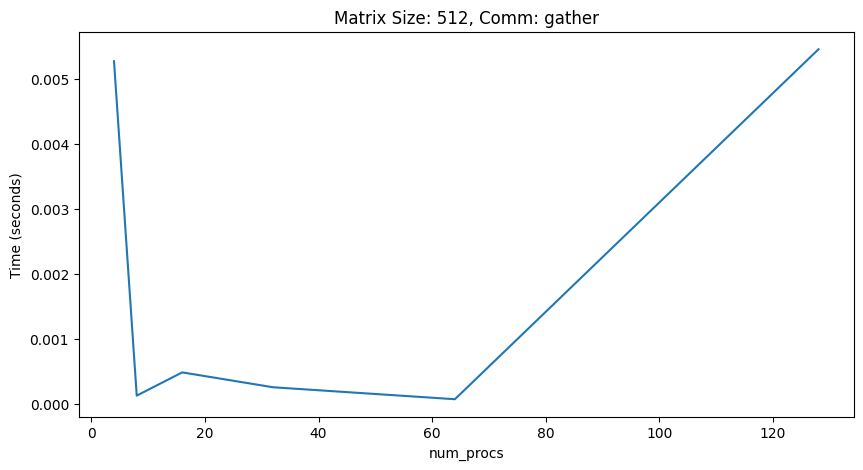

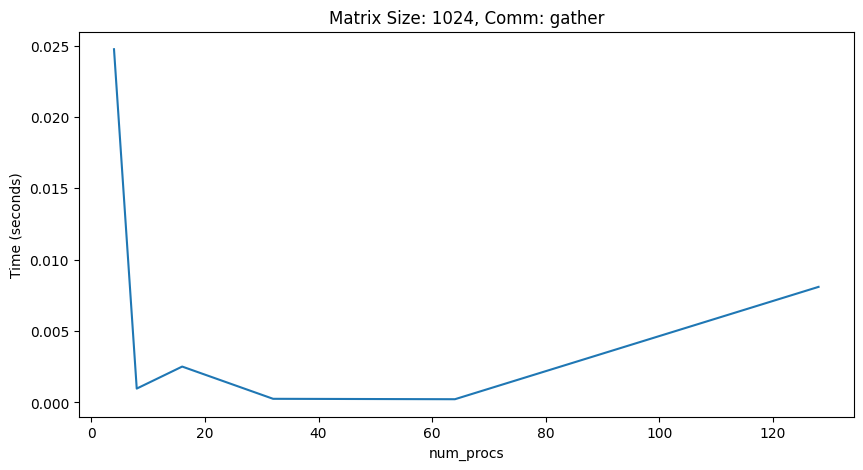

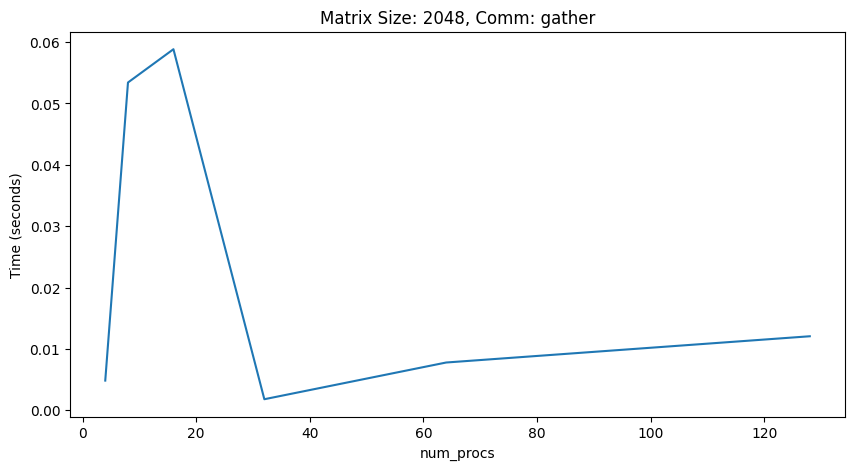

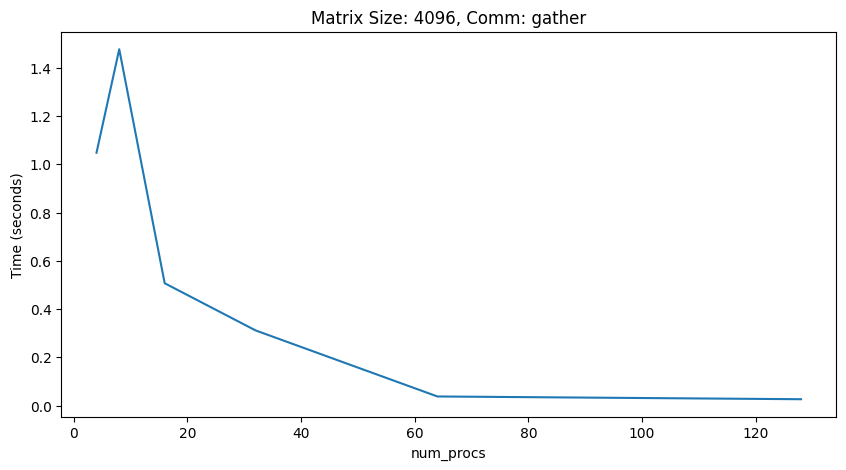

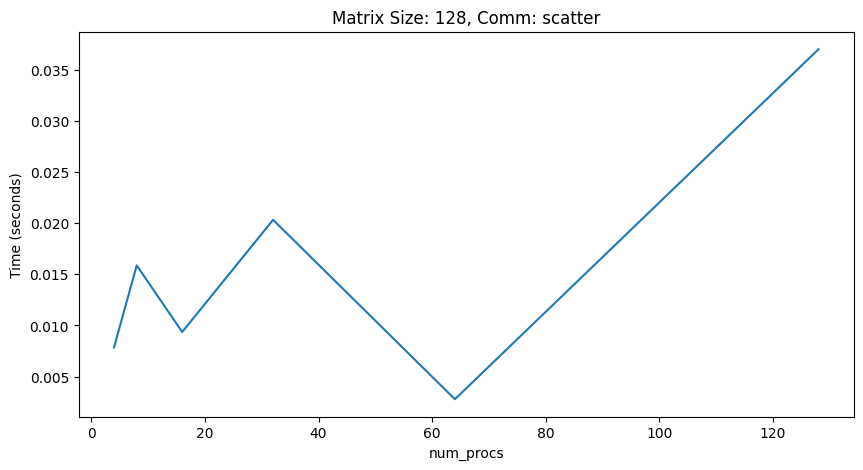

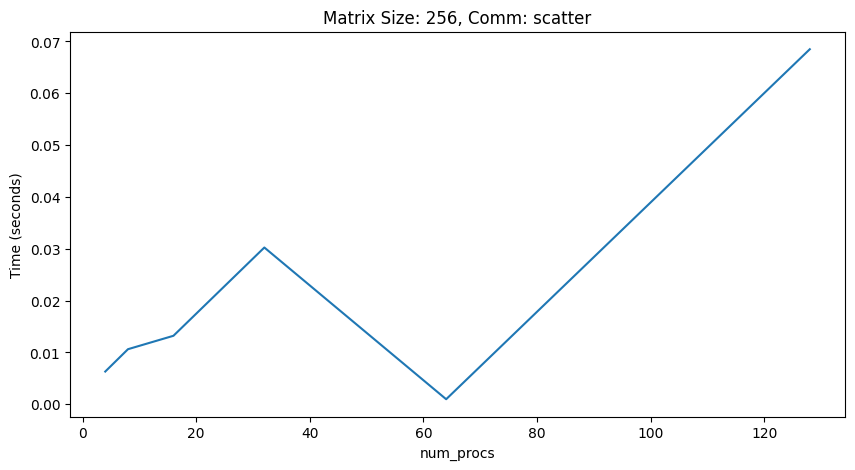

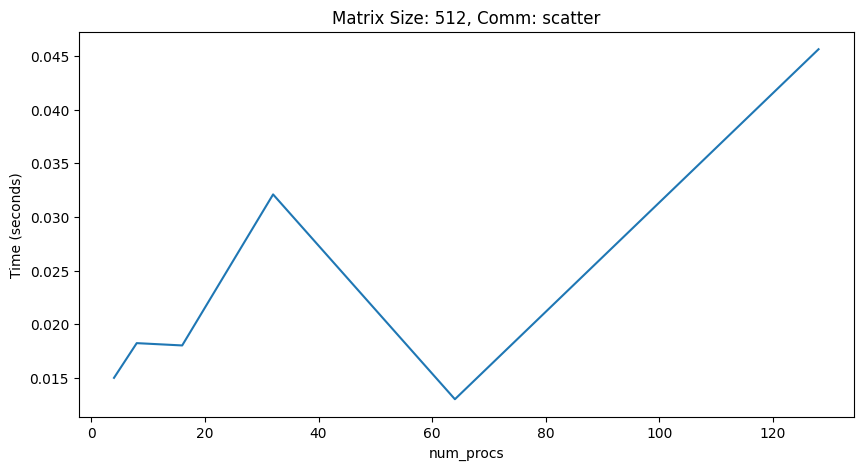

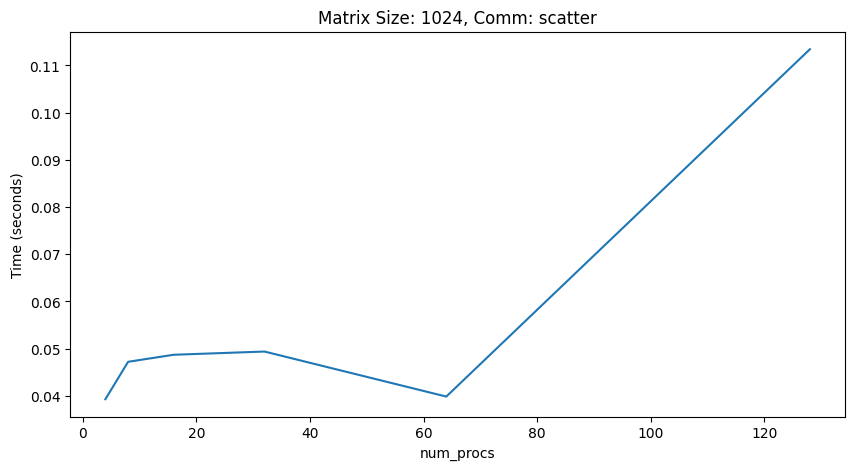

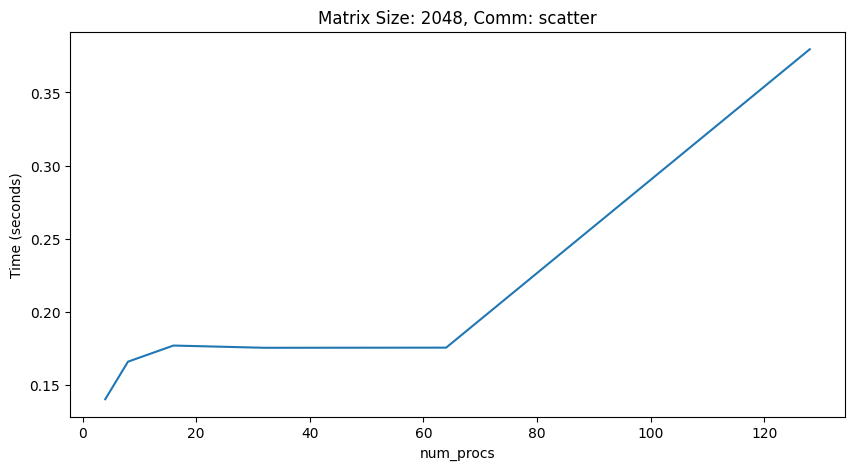

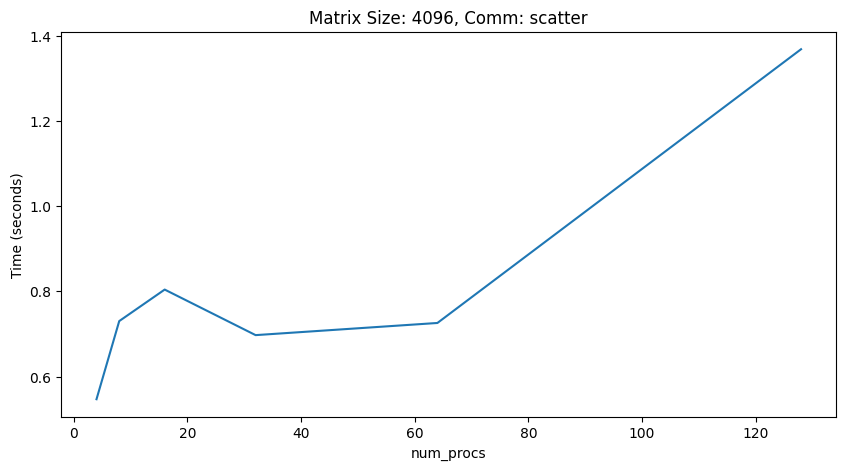

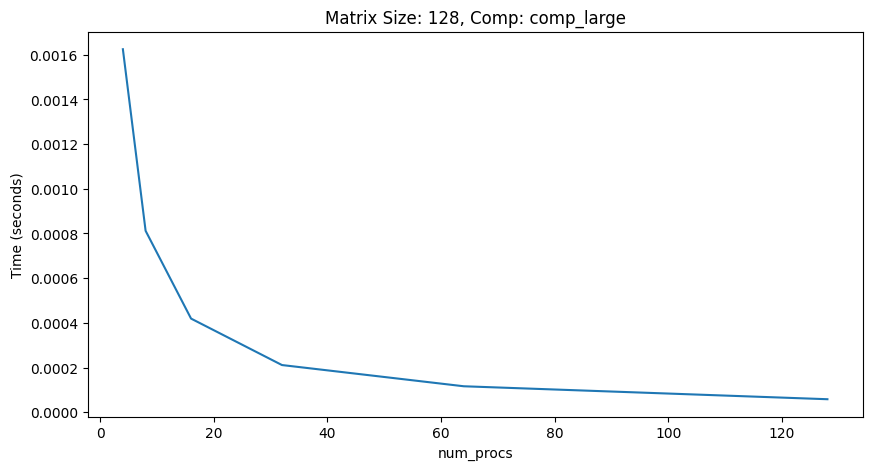

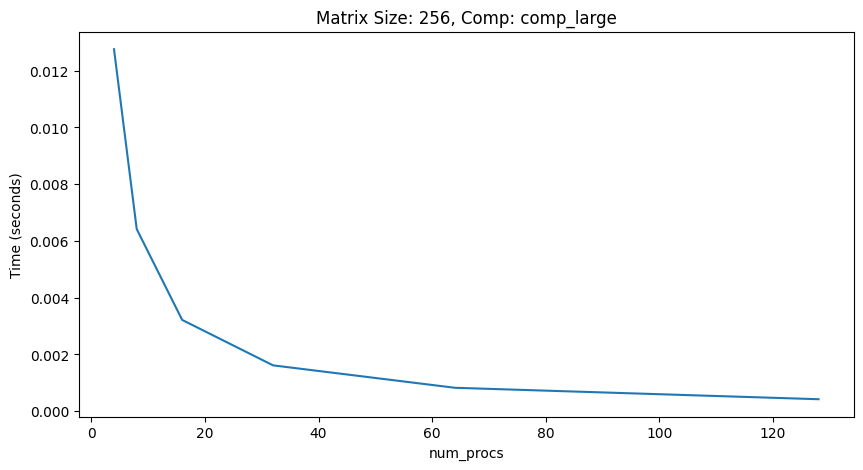

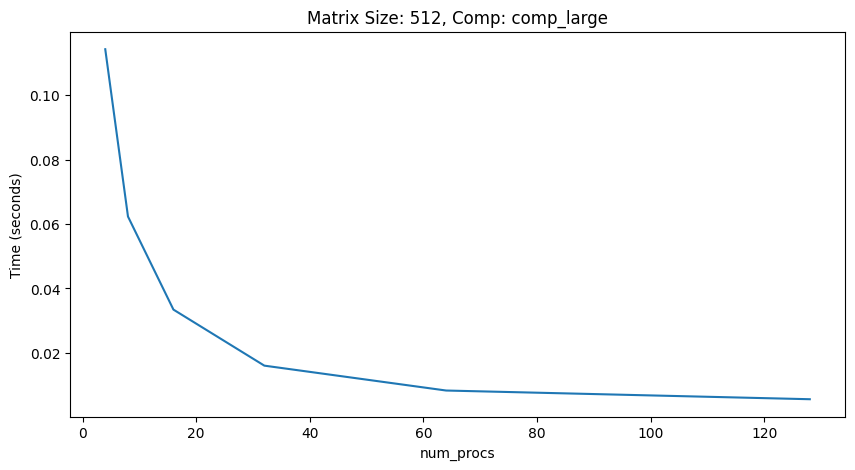

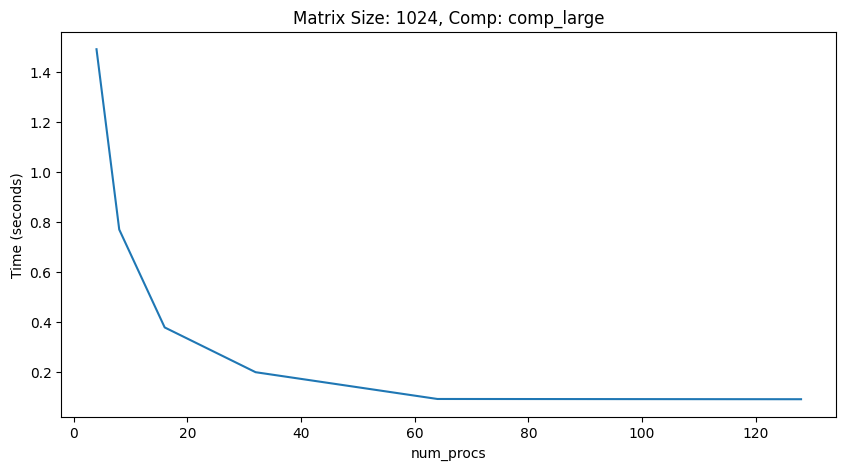

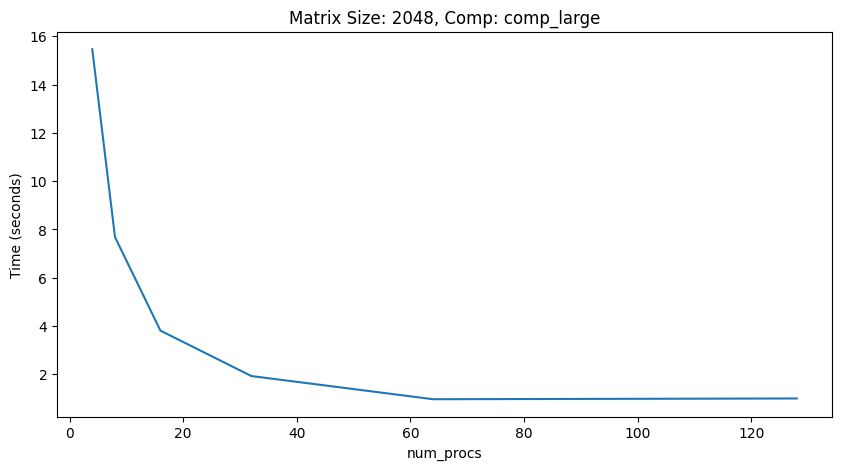

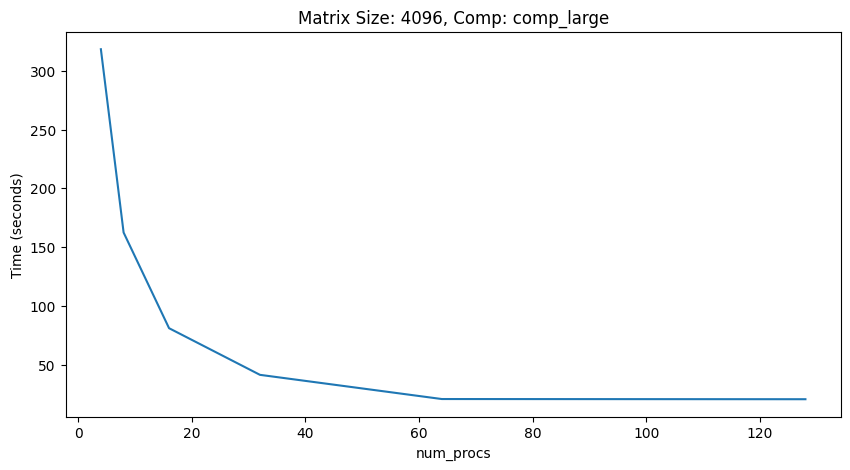

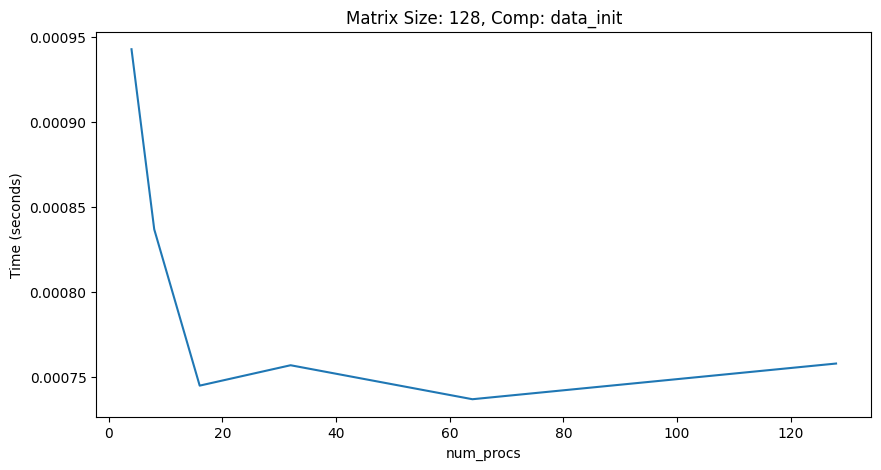

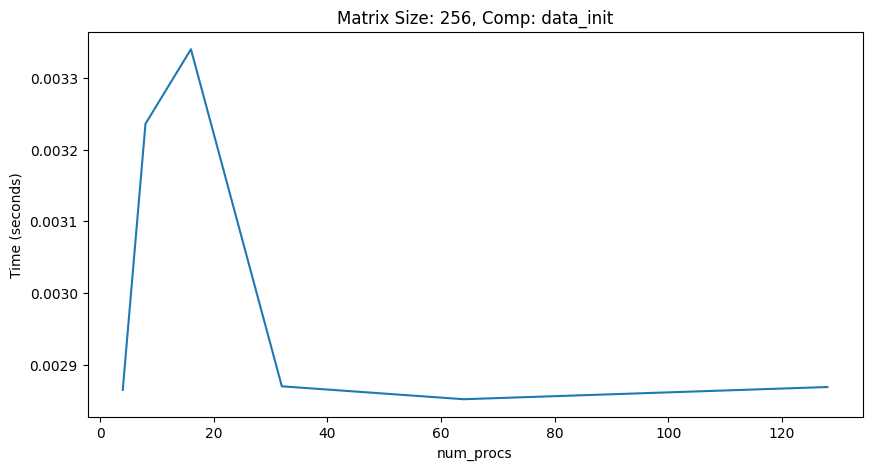

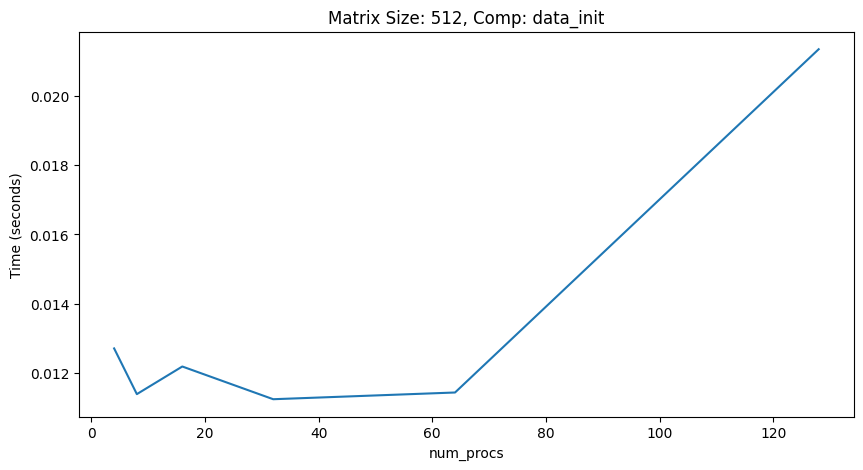

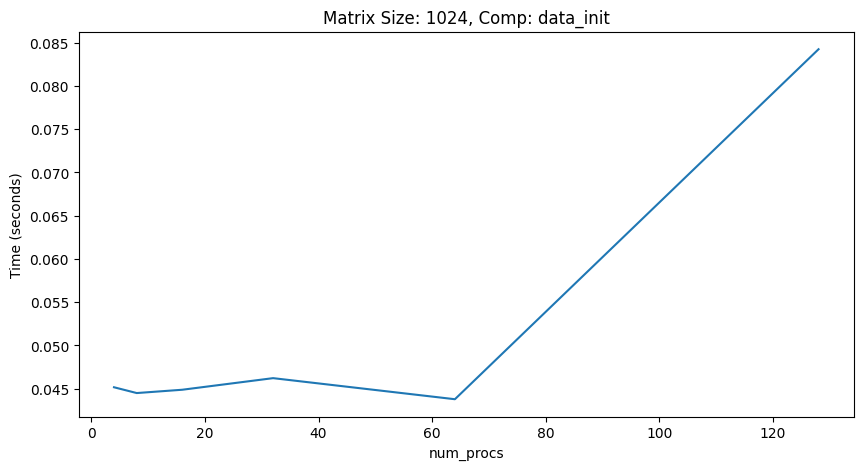

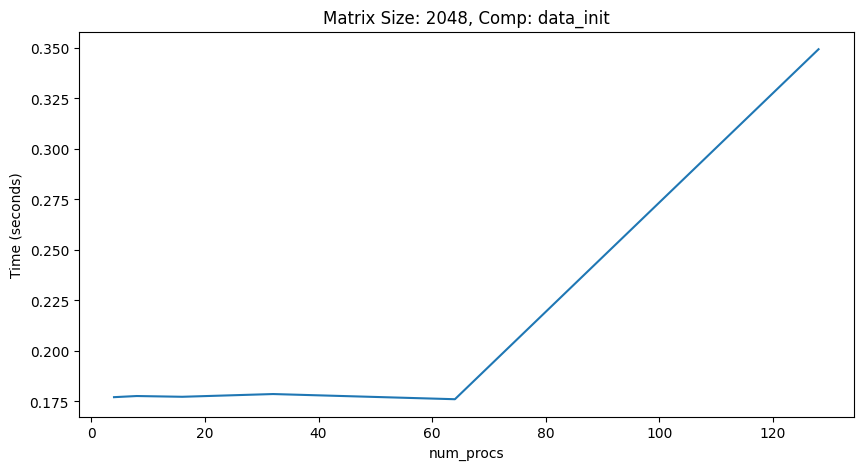

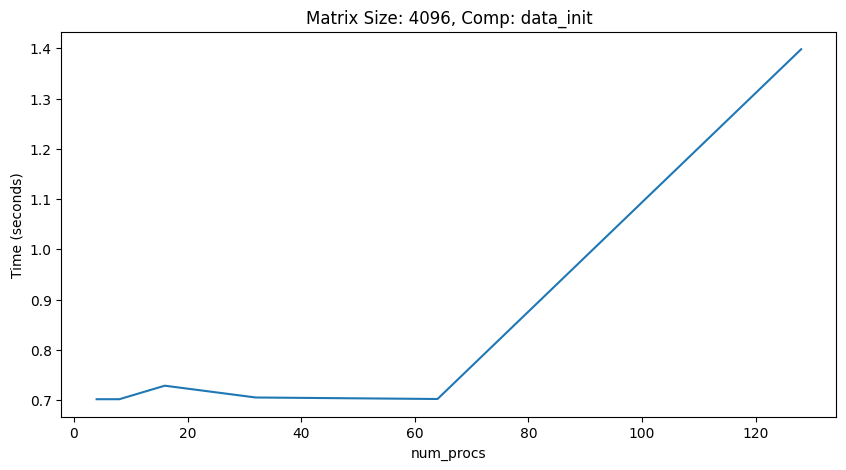

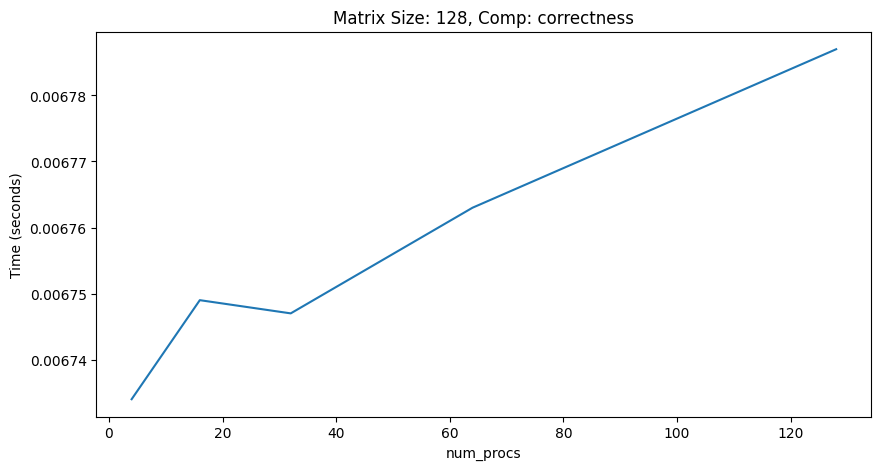

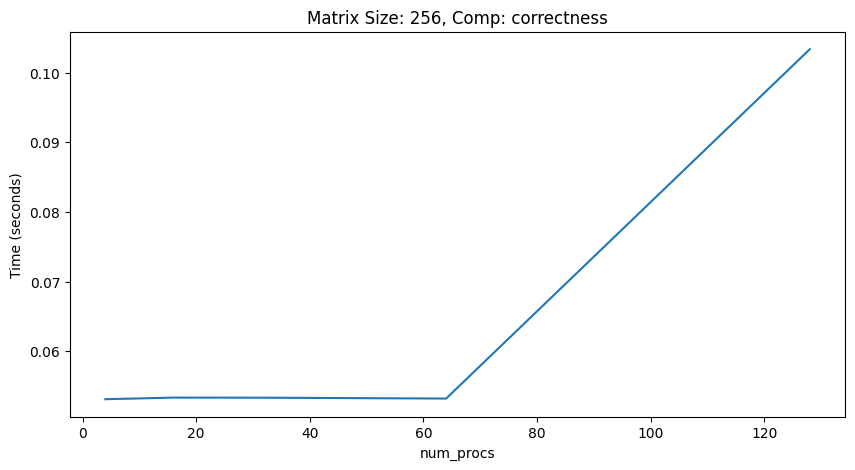

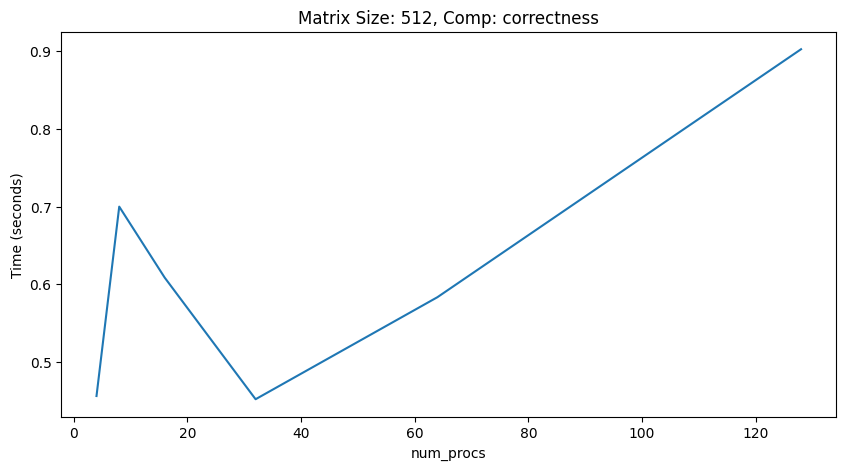

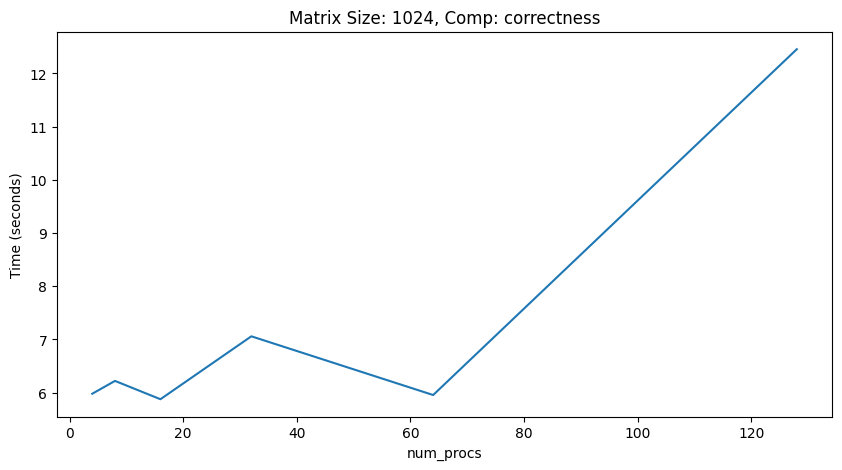

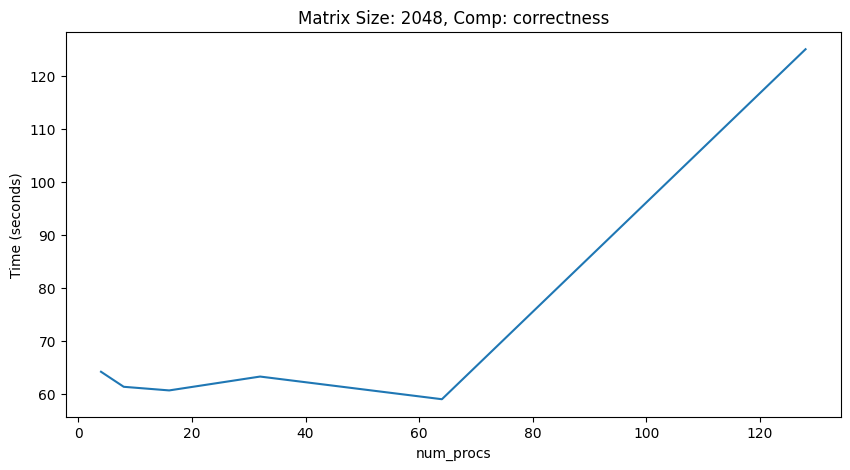

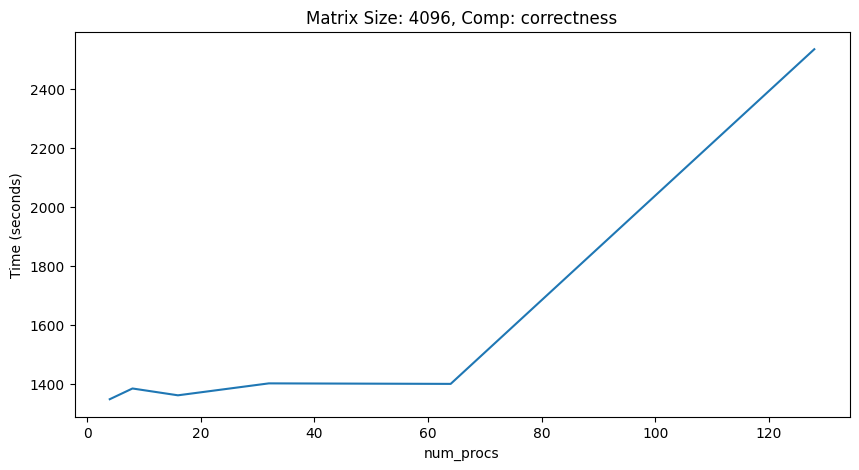

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df = ctk.dataframe

# Define the matrix sizes you want to plot
matrix_sizes = [128, 256, 512, 1024, 2048, 4096]

# Define the communication and computation data series
comm = ["barrier", "bcast", "gather", "scatter"]
comp = ["comp_large", "data_init", "correctness"]

# Loop through matrix sizes and communication data series
for j, data_series in enumerate(comm):
    for i, matrix_size in enumerate(matrix_sizes):
        plt.figure(figsize=(10, 5))  # Create a new figure for each plot
        ax = plt.gca()
        data = df.loc[(data_series, matrix_size), :]
        data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
        data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comm: {data_series}')
        ax.set_xlabel("num_procs")
        ax.set_ylabel("Time (seconds)")
        plt.show()

# Loop through matrix sizes and computation data series
for j, data_series in enumerate(comp):
    for i, matrix_size in enumerate(matrix_sizes):
        plt.figure(figsize=(10, 5))  # Create a new figure for each plot
        ax = plt.gca()
        data = df.loc[(data_series, matrix_size), :]
        data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
        data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comp: {data_series}')
        ax.set_xlabel("num_procs")
        ax.set_ylabel("Time (seconds)")
        plt.show()

In [ ]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

KeyError: 'Level num_procs not found'

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [ ]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [ ]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [ ]:
ctk.dataframe.loc["main"]

4                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            0.392027      0.398540      0.393913     1.575651   
256            0.346411      0.400129      0.360285     1.441141   
512            0.500207      0.958925      0.615386     2.461545   
1024           1.937511      7.917518      3.432799    13.731198   
2048          16.257582     80.443053     32.304383   129.217530   
4096         328.697990   1675.564007    665.414500  2661.657998   

                                         8                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSize                                                                
128                 0.000007      0.433096      0.440360      0.434221   
256                 0.000529      0.492410      0.554987      0.503490   
512                 0.039340      0.529886      1.233589      0.620466   
1024                6.704234      1.325889      7.550431      2.105368   
2048              772.443856      8.460777     69.807645     16.129681   
4096           340134.008948    179.716693   1563.045031    352.633664   

                                                     16                \
            Total time Variance time/rank Min time/rank Max time/rank   
InputSize                                                               
128           3.473769           0.000005      6.131866      9.241619   
256           4.027923           0.000395      0.508943      0.568770   
512           4.963731           0.053707      0.520784      1.136749   
1024         16.842943           4.235534      0.951594      6.832092   
2048        129.037449         411.617690      4.591423     65.259147   
4096       2821.069309      209299.382431     94.743396   1454.893124   

                                                                   32  \
          Avg time/rank   Total time Variance time/rank Min time/rank   
InputSize                                                               
128            7.685408   122.966527           2.398687      6.152744   
256            0.518767     8.300279           0.000184      0.574143   
512            0.564259     9.028137           0.021859      0.522779   
1024           1.323841    21.181450           2.022738      0.701745   
2048           8.386800   134.188794         215.630935      2.819830   
4096         179.756225  2876.099606      108398.274082     45.091347   

                                                                       \
          Max time/rank Avg time/rank   Total time Variance time/rank   
InputSize                                                               
128            9.262938      6.933099   221.859167           1.797111   
256            0.643461      0.589362    18.859579           0.000127   
512            1.005280      0.548887    17.564379           0.006770   
1024           7.764880      0.928738    29.719625           1.507534   
2048          66.892633      5.492441   175.758118         121.681125   
4096        1445.773181     88.866504  2843.728124       59393.410687   

                     64                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            6.139745      9.087473      6.514431   416.923586   
256            3.180303      3.679889      3.591665   229.866588   
512            0.460709      1.103177      0.518809    33.203748   
1024          19.128636     29.219222     22.336157  1429.514063   
2048           2.269738     62.094665      3.961659   253.546177   
4096          23.617032   1422.557660     45.483347  2910.934204   

                                       128                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSi

In [ ]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

NameError: name 'function_names' is not defined

In [ ]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="num_procs",
        ylabel="Time (seconds)",
    )

## Speedup

In [ ]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )